In [9]:
import argparse       
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math
from scipy.special import gamma, comb

In [2]:
# kaiming initilaization
def kaiming_relu(m,h):
    return torch.randn(m,h)*math.sqrt(2/m)

# our initilaization with s
def new_relu(m,h,s):
    return torch.randn(m,h)*math.sqrt(2/m+5*(2-s)/(2*(m**2)))

# to calculate the s-moment
def m(s,X):
    result=0
    num=len(X)
    for i in X:
        result=result+pow(np.abs(i),s)/num
    result=pow(result,1/s)
    return result

In [4]:
out3=[]
for i in range(500):
    torch.manual_seed(i)
    x=torch.randn(64)
    for j in range(500):
        a=kaiming_relu(64,64)
        x=F.relu(a@x)

#     a=kaiming_relu(64,1)
#     x=F.relu(x@a)
    x=x.numpy()
    x=x.tolist()
# #     out3.append(x)
    for j in x:
        out3.append(j)

s=1.5
out4=[]
for i in range(500):
    torch.manual_seed(i)
    x=torch.randn(64)
    for j in range(500):
        a=new_relu(64,64,s)
        x=F.relu(a@x)

#     a=new_relu(64,1,s)
#     x=F.relu(x@a)
    x=x.numpy()
    x=x.tolist()
#     out4.append(x)
    for j in x:
        out4.append(j)
        
s=1
out5=[]
for i in range(500):
    torch.manual_seed(i)
    x=torch.randn(64)
    for j in range(500):
        a=new_relu(64,64,s)
        x=F.relu(a@x)

#     a=new_relu(64,1,s)
#     x=F.relu(x@a)
    x=x.numpy()
    x=x.tolist()
#     out4.append(x)
    for j in x:
        out5.append(j)
        
s=0.5
out6=[]
for i in range(500):
    torch.manual_seed(i)
    x=torch.randn(64)
    for j in range(500):
        a=new_relu(64,64,s)
        x=F.relu(a@x)
        
#     a=new_relu(64,1,s)
#     x=F.relu(x@a)
    x=x.numpy()
    x=x.tolist()
#     out4.append(x)
    for j in x:
        out6.append(j)

In [5]:
S=[]
for i in range(21):
    S.append(1+i*0.1)
s2=[]
s15=[]
s1=[]
s05=[]
for i in S:
    s2.append(m(i,out3))
    s15.append(m(i,out4))
    s1.append(m(i,out5))
    s05.append(m(i,out6))

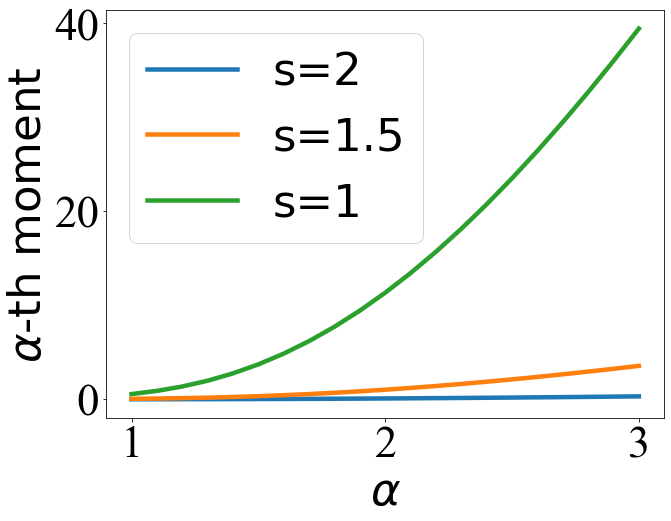

In [7]:
import matplotlib.pyplot as plt
figsize = 10,7.5
figure, ax = plt.subplots(figsize=figsize)
plt.plot(S,s2,linewidth=4.5)
plt.plot(S,s15,linewidth=4.5)
plt.plot(S,s1,linewidth=4.5)
# plt.plot(S,s05)
plt.ylabel(r'$\alpha$-th moment',fontsize=45)
plt.xlabel(r'$\alpha$',fontsize=45)
plt.tick_params(labelsize=45)
plt.legend(['s=2','s=1.5','s=1'], loc='upper left',fontsize=45)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


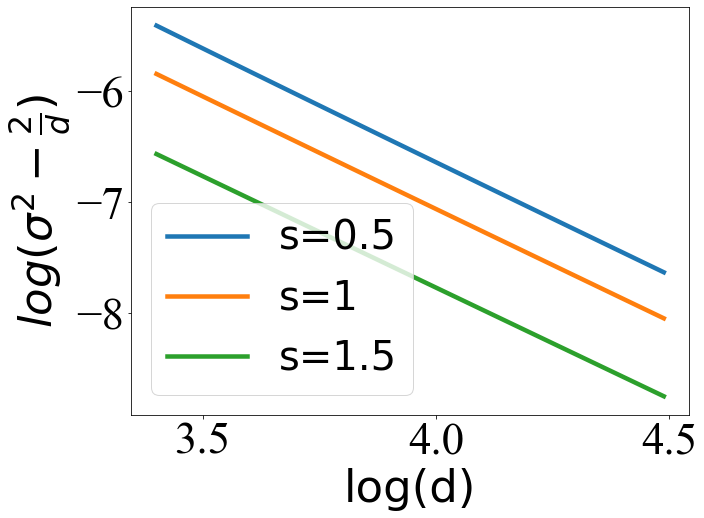

In [11]:
data=[]
s=1
for i in range(60):
    d=i+30
    temp=0
    for n in range(d+1):
        temp=temp+comb(d,n)*1/(2**(d))*gamma((n)/2+s/2)/gamma((n)/2)
    temp=temp*pow(2,s/2)
    sigma=1/(pow(temp,1/s))
    sigma=sigma**2-2/(d)
    data.append(np.log(sigma))
    
data15=[]
s=1.5
for i in range(60):
    d=i+30
    temp=0
    for n in range(d+1):
        temp=temp+comb(d,n)*1/(2**(d))*gamma((n)/2+s/2)/gamma((n)/2)
    temp=temp*pow(2,s/2)
    sigma=1/(pow(temp,1/s))
    sigma=sigma**2-2/(d)
    data15.append(np.log(sigma))
    
data2=[]
s=2
for i in range(60):
    d=i+30
    temp=0
    for n in range(d+1):
        temp=temp+comb(d,n)*1/(2**(d))*gamma((n)/2+s/2)/gamma((n)/2)
    temp=temp*pow(2,s/2)
    sigma=1/(pow(temp,1/s))
    sigma=sigma**2-2/(d)
    data2.append(np.log(sigma))
    
data0=[]
s=0.5
for i in range(60):
    d=i+30
    temp=0
    for n in range(d+1):
        temp=temp+comb(d,n)*1/(2**(d))*gamma((n)/2+s/2)/gamma((n)/2)
    temp=temp*pow(2,s/2)
    sigma=1/(pow(temp,1/s))
    sigma=sigma**2-(2/(d))
    data0.append(np.log(sigma))
    
d1=[]
for i in range(60):
    d=i+30
    d1.append(np.log(d))
    
import matplotlib.pyplot as plt
figsize = 10,7.5
figure, ax = plt.subplots(figsize=figsize)
# plt.plot(d1,data01)
# plt.plot(d1,data03)
plt.plot(d1,data0,linewidth=4.5)
plt.plot(d1,data,linewidth=4.5)
plt.plot(d1,data15,linewidth=4.5)
# plt.plot(d1,data2)
# plt.title('s=1',fontsize=20)
plt.ylabel(r'$log(\sigma^2-\frac{2}{d})$',fontsize=45)
plt.xlabel('log(d)',fontsize=45)
plt.tick_params(labelsize=45)
plt.legend(['s=0.5','s=1','s=1.5','s=2'], loc='best',fontsize=40)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
plt.show()